1.dağılım = np.random.dağılım_adı([],[]) kodunu kullanarak, dağılım_adı yazan yere seçtiğiniz bir dağılımı ve parantez içinde [] şeklinde gösterilen boşlukları yine kendi seçiminiz doğrultusunda doldurun. Daha sonra, a) Verinin histogramını çiziniz b) Q-Q grafiğini çizip yorumlayınız

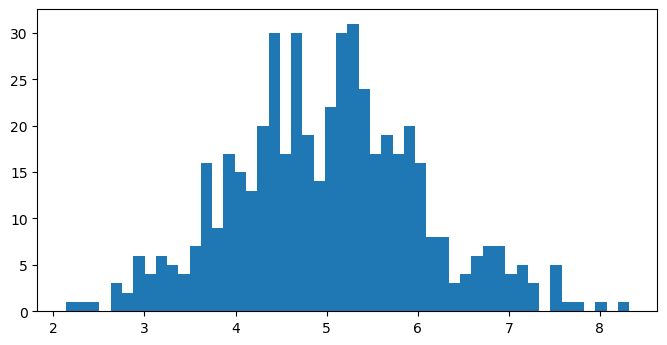

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

dağılım = np.random.normal(5,1,500)
plt.figure(figsize=(8,4), dpi = 100)
plt.hist(dağılım, bins = 50)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

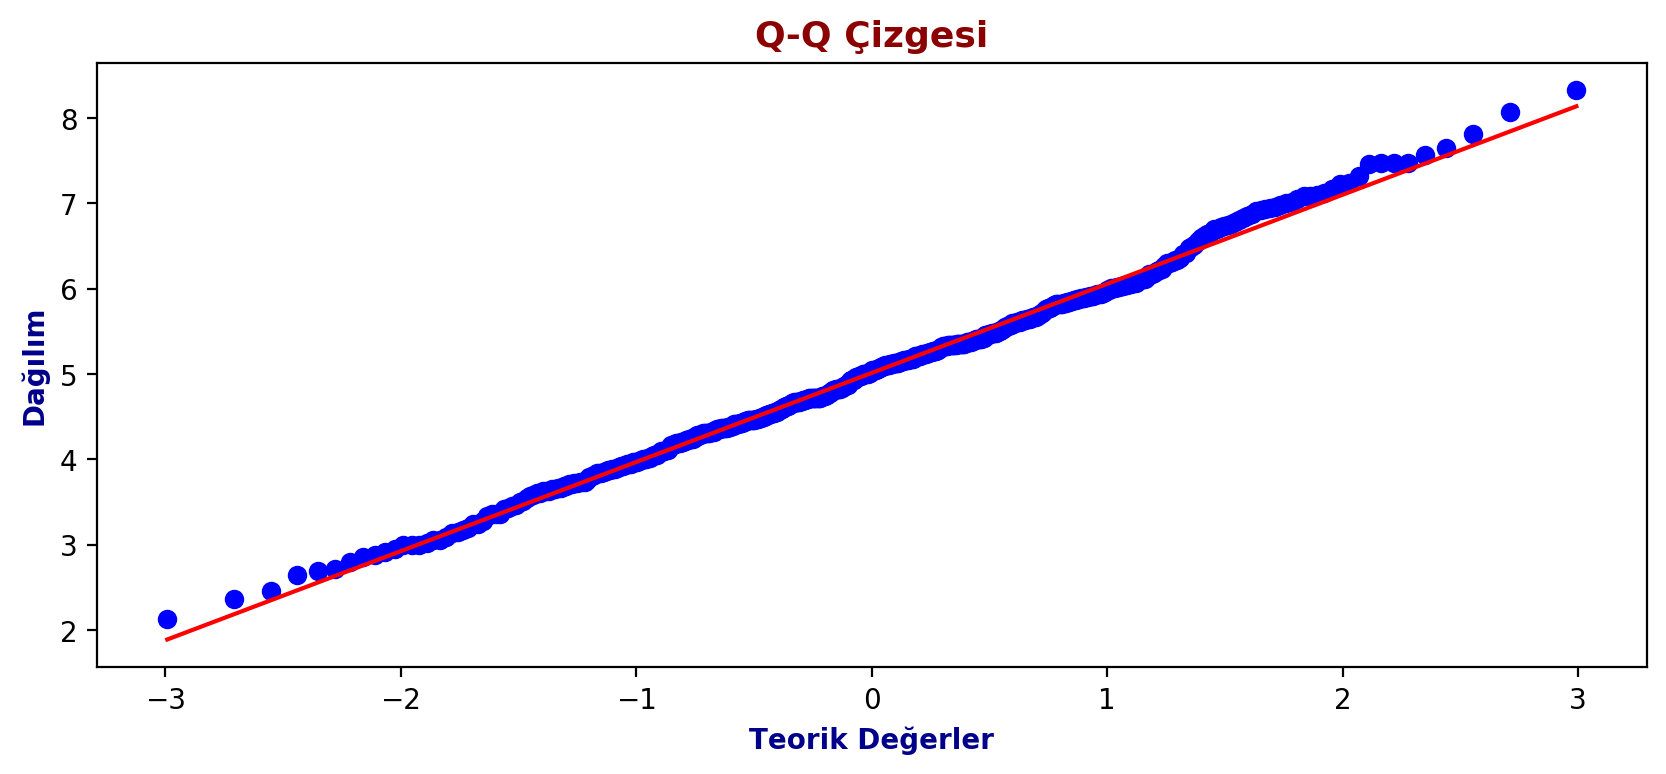

In [4]:
dağılım.sort()
plt.figure(figsize=(10,4),dpi = 200)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
nsample = 100
res = stats.probplot(dağılım,plot=plt)
plt.title("Q-Q Çizgesi", fontdict = baslik_font)
plt.xlabel("Teorik Değerler", fontdict = eksen_font)
plt.ylabel("Dağılım", fontdict = eksen_font)
plt.show

https://finance.yahoo.com/ sitesini kullanarak google şirketinin 2015-2017 yılları arasında hisse senedi fiyatlarını elde edin. Bu veriyi kullanarak hisse senedi getirisini şu formülle hesaplayın: P t − P t − 1 / P t − 1

(burada
P t t zamanındaki hisse senedi fiyatını ve
P t − 1 ise t-1 zamanındaki hisse senedi fiyatını vermektedir). Getiriler dağılımı hangi dağılıma daha yakındır?

Not: https://finance.yahoo.com/ adresinden veri şu şekilde çekilir. Verilen adres tıkladıktan sonra arama bölümüne aramak istediğiniz hisse senedinin adını yazın (ör: google). Arama sonucu altta çıkan sonuca tıklayarak ilgili hisse senedine gidiniz. İlgili hisse senedinin bilgilerinin bulunduğu sayfaya geldiğinizde Historical Prices (Geçmiş veriler) sekmesine tıklayın ve ilgili tarih aralığını seçtikten sonra Apply'a tıklayın. Son olarak Download Data butonuna basarak veriyi indirin.

In [5]:
apple = pd.read_csv('/home/buket/Jupyter/Data/AAPL.csv')
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-24,127.230003,128.039993,126.559998,126.690002,116.587677,32842300
1,2015-03-25,126.540001,126.820000,123.379997,123.379997,113.541618,51655200
2,2015-03-26,122.760002,124.879997,122.599998,124.239998,114.333046,47572900
3,2015-03-27,124.570000,124.699997,122.910004,123.250000,113.421997,39546200
4,2015-03-30,124.050003,126.400002,124.000000,126.370003,116.293190,47099700
...,...,...,...,...,...,...,...
500,2017-03-17,141.000000,141.000000,139.889999,139.990005,133.989166,43885000
501,2017-03-20,140.399994,141.500000,140.229996,141.460007,135.396149,21542000
502,2017-03-21,142.110001,142.800003,139.729996,139.839996,133.845581,39529900
503,2017-03-22,139.850006,141.600006,139.759995,141.419998,135.357864,25860200


In [6]:
# apple['Getiri'] = apple['Close'].diff()
# getiri = list(apple['Getiri'])
# apple['Getiri']


In [10]:
h=apple['Close']
g=0
getiri=[]
for i in range(1,len(h)):
    g+= (h[i]- h[i-1] )/ h[i-1]
    getiri.append(g)
getiri.insert(0,0)

In [11]:
normal_dağılım = np.random.normal(np.mean(getiri),
                                  np.std(getiri),505)

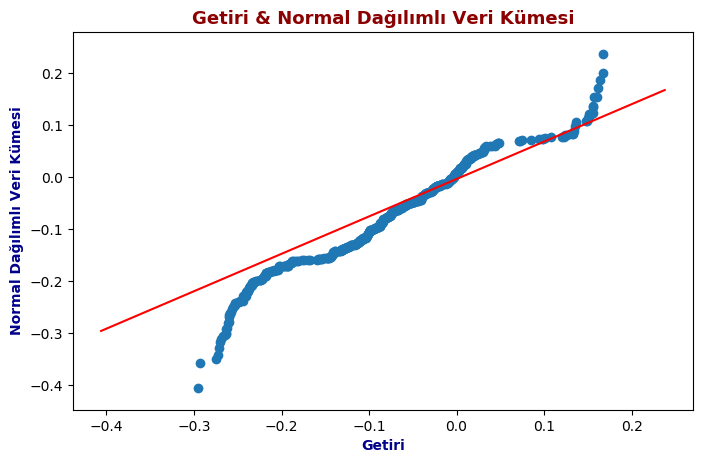

In [12]:
getiri.sort()
normal_dağılım.sort()
plt.figure(figsize=(8,5), dpi = 100)
plt.title('Getiri & Normal Dağılımlı Veri Kümesi', fontdict = baslik_font)
plt.xlabel('Getiri', fontdict = eksen_font)
plt.ylabel('Normal Dağılımlı Veri Kümesi', fontdict = eksen_font)
plt.scatter(getiri, normal_dağılım)
plt.plot([np.min(normal_dağılım), np.max(normal_dağılım)],
         [np.min(getiri), np.max(getiri)],c='red')
plt.show()

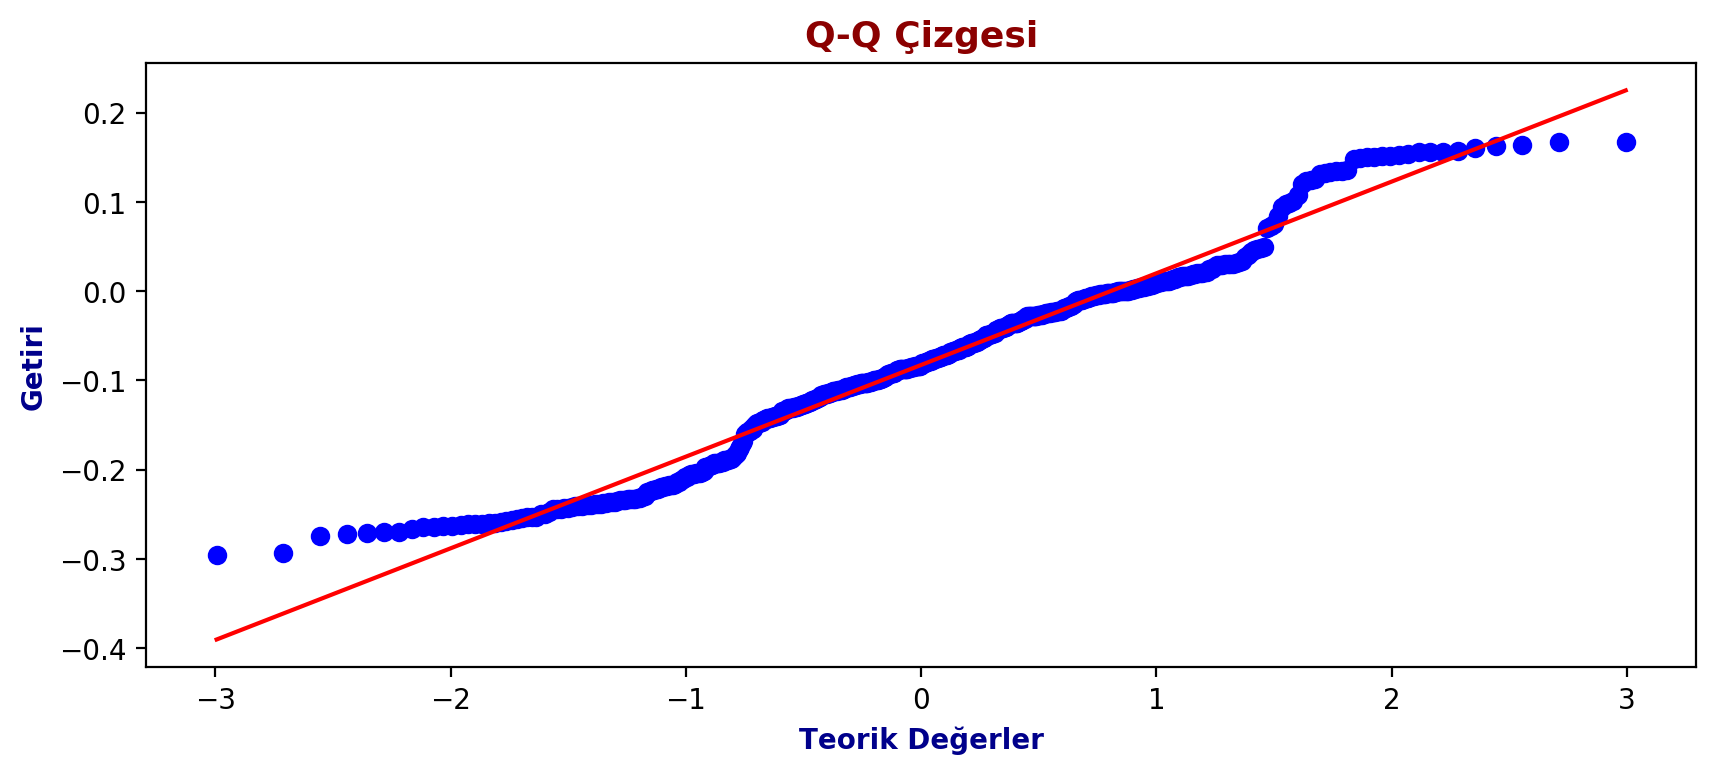

In [13]:
plt.figure(figsize=(10,4), dpi=200)
nsample = 100
res = stats.probplot(getiri,plot=plt)
plt.title("Q-Q Çizgesi", fontdict = baslik_font)
plt.xlabel("Teorik Değerler", fontdict = eksen_font)
plt.ylabel("Getiri", fontdict = eksen_font)
plt.show()

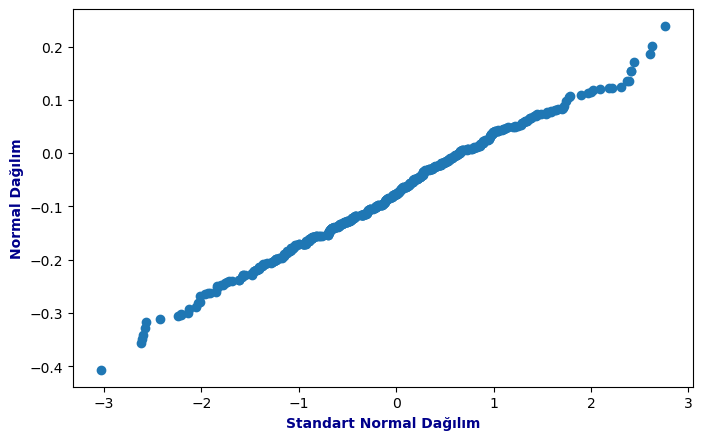

In [14]:
standart_normal_dagilimli = np.random.normal(0, 1, 505)
standart_normal_dagilimli.sort()
plt.figure(figsize=(8,5), dpi = 100)
plt.plot(standart_normal_dagilimli, normal_dağılım, "o") 
plt.ylabel('Normal Dağılım', fontdict = eksen_font) 
plt.xlabel('Standart Normal Dağılım', fontdict = eksen_font)
plt.show()

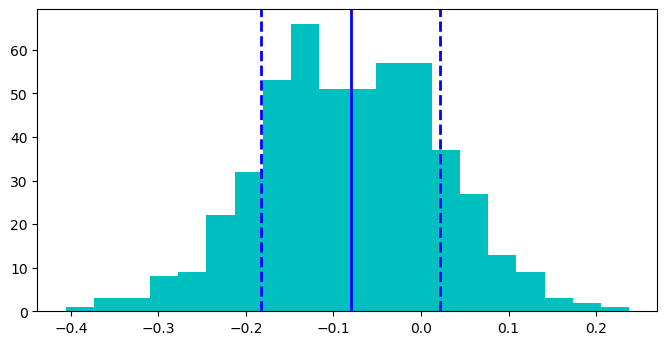

In [15]:
plt.figure(figsize=(8,4), dpi = 100)
plt.hist(normal_dağılım, bins=20, color = 'c')
plt.axvline(np.mean(normal_dağılım), color='b', linestyle='solid', linewidth=2)
plt.axvline(np.mean(normal_dağılım) + np.std(normal_dağılım), 
            color='b', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(normal_dağılım) - np.std(normal_dağılım), 
            color='b', linestyle='dashed', linewidth=2)
plt.show()